# Gradient Descent

In [1]:
import numpy as np

In [2]:
np.random.seed(0)

# Generate Data

In [3]:
n, d = 100, 3
X = np.random.rand(n, d)


In [4]:
# w_gt : the Actual value of w 
w_gt = np.array([1, 2, 3])

In [5]:
w_gt.reshape(-1, 1)

array([[1],
       [2],
       [3]])

In [6]:
error = np.random.randn(100, 1)

In [7]:
y = X @ w_gt.reshape(-1, 1) + error

In [8]:
X = np.hstack((np.ones((n, 1)), X))

## Gradient Descent

- number of iterations 
- error difference

In [9]:
#define Gradient Function 
def gradient(X, y, w):
    n, d = X.shape
    grad = X.T @ ((X @ w) - y) / n
    return grad 

In [10]:
#Example
gradient(X, y, np.zeros((4, 1)))

array([[-2.90928278],
       [-1.5532363 ],
       [-1.56101271],
       [-1.76752543]])

In [11]:
#cost function for measuring the difference Error
def cost_function(X, y, w):
    n, d = X.shape
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2)/ (2 * n)

In [12]:
# to get adaptive step-size 
def line_search(X, y, w, tel=0.001, betha=0.7):
    
    old_cost = cost_function(X, y, w)
    grad = gradient(X, y, w)
    step_size = 10
    
    while cost_function(X, y, w - step_size * grad) > old_cost + tel: 
        step_size = step_size * betha 
        
    return step_size

In [13]:
# define w and costs in Data
def gradient_descent(X, y, num_iter=100):
    #fisrt we assume '0' for w
    n, d = X.shape
    w = np.zeros((d, 1))
    
    costs = []
    for _ in range(num_iter):
        step_size = line_search(X, y, w)
        w = w - step_size * gradient(X, y, w)
        costs.append(cost_function(X, y, w))
        
    return w, costs

In [14]:
w, costs = gradient_descent(X, y, num_iter=100)
w

array([[-0.07231239],
       [ 0.57219368],
       [ 1.95750881],
       [ 3.22867608]])

In [15]:
cost_function(X, y, w)

0.4341017908519645

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

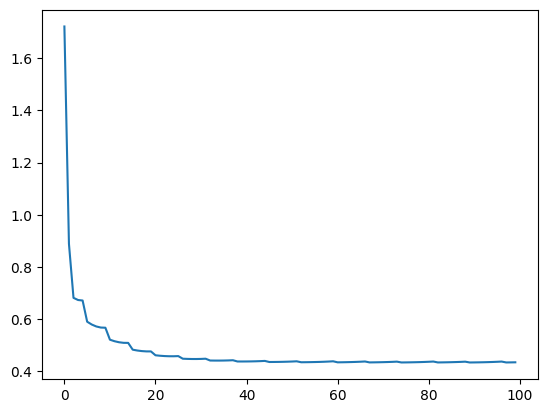

In [17]:
plt.plot(
    range(len(costs)),
    costs,
);